<a href="https://colab.research.google.com/github/noraisyahh/CreditFacility/blob/main/Python_Project_Credit_Facility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4 Data Pre-processing Tasks

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/DELL/Desktop/Backup/Downloads/Y2-S1/ANL252/ECA_data.csv", na_filter=True) #Using na_filter = True to identify missing values

df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


In [ ]:
df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

### 1) Treating Missing Values

In [ ]:
df.isnull().sum(axis=0).sort_values(ascending=False) #Checking for count of missing values for each column

MARITAL      38
EDUCATION    13
ID            0
S5            0
R4            0
R3            0
R2            0
R1            0
B5            0
B4            0
B3            0
B2            0
B1            0
S4            0
LIMIT         0
S3            0
S2            0
S1            0
AGE           0
GENDER        0
RATING        0
INCOME        0
BALANCE       0
R5            0
dtype: int64

In [ ]:
missing_rows = df.isnull().any(axis=1) #Checking for boolean of missing values for each row
df.loc[missing_rows[missing_rows == True].index] #Retrieving indices of rows with missing data

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
521,519,290000,9195.725,294806,0,1,2.0,NaN,49,0,...,53829,53841,54486,55198,55878,1926,1931,1989,2002,2028
694,692,140000,13279.525,151880,0,0,3.0,NaN,47,0,...,67073,57233,52295,49047,38796,5017,10012,10013,3010,6015
819,817,80000,1237.250,74355,0,1,3.0,NaN,37,0,...,3087,5210,3882,4785,1000,5215,3882,4785,1968,0
847,845,30000,3525.025,20346,0,1,3.0,NaN,46,2,...,19532,22194,21542,24022,25473,3000,0,3000,2000,0
1501,1499,70000,2861.950,56633,0,1,3.0,NaN,34,2,...,17295,16720,18438,18004,19546,0,2000,0,2000,0
2594,2592,120000,578.725,143627,0,1,3.0,NaN,41,0,...,0,0,0,1344,881,0,0,1344,929,599
3400,3398,350000,891.625,344631,0,1,NaN,2.0,53,-1,...,4815,61044,22611,1385,6043,61349,22687,1389,6058,1153
3876,3874,210000,448.525,211085,0,0,NaN,2.0,45,0,...,5854,1032,788,3499,3372,1032,788,3565,3372,15381
5350,5348,20000,315.000,23066,0,0,3.0,NaN,29,4,...,1800,1800,1800,1800,1800,0,0,0,0,0
5650,5648,100000,1337.350,95891,0,0,NaN,2.0,37,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dropna(subset = ["EDUCATION", "MARITAL"], inplace=True) #Dropping rows with missing values
df.isnull().sum(axis=0).sort_values(ascending=False) #Checking for count of missing values for each column

ID           0
LIMIT        0
R4           0
R3           0
R2           0
R1           0
B5           0
B4           0
B3           0
B2           0
B1           0
S5           0
S4           0
S3           0
S2           0
S1           0
AGE          0
MARITAL      0
EDUCATION    0
GENDER       0
RATING       0
INCOME       0
BALANCE      0
R5           0
dtype: int64

### 2) Removing Characters and Changing Data Types

In [ ]:
df.dtypes #Checking data types of each variable

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

In [ ]:
df.iloc[1795:1805] #To show $ and comma characters in R3 column

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
1800,1798,120000,0.000,132691,0,1,2.0,1.0,28,0,...,0,0,0,0,0,0,0,$0,0,0
1801,1799,90000,14819.175,102269,0,1,2.0,1.0,35,0,...,81491,81003,68764,67957,69313,3914,2774,"$2,620",2640,3000
1802,1800,180000,565.425,208237,0,1,2.0,2.0,25,-1,...,12513,-628,4940,1740,390,0,10000,"$6,000",6000,1567
1803,1801,80000,10594.850,94482,0,1,1.0,2.0,32,0,...,61715,60582,61453,61858,61104,2100,2349,"$2,200",2200,2200
1804,1802,130000,68.250,151746,1,0,2.0,1.0,45,-1,...,390,390,390,390,0,390,390,$390,0,780
1805,1803,230000,3068.100,272850,0,1,1.0,2.0,26,0,...,13033,2688,2688,2688,6393,2688,2688,"$2,688",6393,6504
1806,1804,130000,629.475,144059,1,1,1.0,2.0,26,-1,...,4398,3738,1396,13069,1285,3746,1396,"$13,069",1285,1034
1807,1805,190000,30804.900,223013,0,0,2.0,2.0,33,0,...,166336,162100,155584,157988,154366,8004,5500,"$7,000",6000,5000
1808,1806,210000,31937.675,207501,0,1,1.0,2.0,31,0,...,187796,190227,127436,129714,131440,8000,5000,"$5,000",5000,5000
1809,1807,20000,1972.425,11639,0,1,3.0,1.0,52,0,...,13513,12999,14456,16313,15766,0,1686,"$2,089",0,0


In [ ]:
df["R3"] = df["R3"].replace({"\$":"",",":""}, regex=True).astype("int64") #Removing $ and comma characters in R3 values
df.iloc[1795:1805] #To show that the R3 values has been changed

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
1800,1798,120000,0.000,132691,0,1,2.0,1.0,28,0,...,0,0,0,0,0,0,0,0,0,0
1801,1799,90000,14819.175,102269,0,1,2.0,1.0,35,0,...,81491,81003,68764,67957,69313,3914,2774,2620,2640,3000
1802,1800,180000,565.425,208237,0,1,2.0,2.0,25,-1,...,12513,-628,4940,1740,390,0,10000,6000,6000,1567
1803,1801,80000,10594.850,94482,0,1,1.0,2.0,32,0,...,61715,60582,61453,61858,61104,2100,2349,2200,2200,2200
1804,1802,130000,68.250,151746,1,0,2.0,1.0,45,-1,...,390,390,390,390,0,390,390,390,0,780
1805,1803,230000,3068.100,272850,0,1,1.0,2.0,26,0,...,13033,2688,2688,2688,6393,2688,2688,2688,6393,6504
1806,1804,130000,629.475,144059,1,1,1.0,2.0,26,-1,...,4398,3738,1396,13069,1285,3746,1396,13069,1285,1034
1807,1805,190000,30804.900,223013,0,0,2.0,2.0,33,0,...,166336,162100,155584,157988,154366,8004,5500,7000,6000,5000
1808,1806,210000,31937.675,207501,0,1,1.0,2.0,31,0,...,187796,190227,127436,129714,131440,8000,5000,5000,5000,5000
1809,1807,20000,1972.425,11639,0,1,3.0,1.0,52,0,...,13513,12999,14456,16313,15766,0,1686,2089,0,0


In [ ]:
df["EDUCATION"] = df["EDUCATION"].apply(np.int64) #Converting Education data type from float to int64
df["MARITAL"] = df["MARITAL"].apply(np.int64) #Converting Marital data type from float to int64
df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION      int64
MARITAL        int64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             int64
R4             int64
R5             int64
dtype: object

### 3) Detecting and Removing Outliers

In [ ]:
q1 = df["LIMIT"].quantile(q = 0.25) #Determining the first quartile
q3 = df["LIMIT"].quantile(q = 0.75) #Determining the third quartile
iqr = q3 - q1 #Calculating IQR
low_bound = q1 - 1.5 * iqr #Calculating the lower threshold
upp_bound = q3 + 1.5 * iqr #Caluclating the upper threshold
print(f"q1: {q1}\nq3: {q3}\ninterquartile range: {iqr}\nlower threshold: {low_bound}\nupper threshold: {upp_bound}")

q1: 50000.0
q3: 240000.0
interquartile range: 190000.0
lower threshold: -235000.0
upper threshold: 525000.0


In [ ]:
df[(df["LIMIT"] < low_bound) | (df["LIMIT"] > upp_bound)] #Retrieving rows with outliers based on the combined condition

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
300,300,610000,152.950,693010,0,1,1,2,36,0,...,-256,-255,-538,107592,168966,1,0,108130,30695,179
735,733,610000,47192.600,614758,0,0,1,2,35,0,...,274882,276887,260761,266747,271886,11000,10000,11000,10000,10000
761,759,620000,60712.225,731673,0,0,1,1,39,0,...,90849,90493,90025,88406,89111,5400,3173,3200,3500,3164
1012,1010,550000,7373.100,570083,1,1,1,2,34,0,...,44045,45392,48244,36206,38021,3004,4010,3002,3000,10010
1273,1271,560000,29436.925,616480,0,0,2,1,43,0,...,139873,142391,145345,148177,139831,4827,4974,4942,4573,4074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18340,18338,570000,68056.975,675664,0,0,1,2,33,0,...,253793,261176,266800,0,0,11472,12000,0,0,0
18509,18507,620000,999.600,654994,0,0,2,2,31,0,...,11598,21049,13846,3565,7076,21171,13915,3583,7111,1971
18630,18628,650000,370.825,661335,0,0,1,1,44,0,...,5094,5158,7139,1034,2127,5180,7201,1035,2139,3463
18655,18653,630000,22045.625,679050,0,0,2,1,46,0,...,91247,81317,146005,146207,106467,4300,84700,4211,4470,3600


In [ ]:
df = df[~((df["LIMIT"] < low_bound) | (df["LIMIT"] > upp_bound))] #Retrieving rows without outliers and updating dataframe
display(df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2,1,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


### 4) Discretisation

In [ ]:
df["AGE"] = df["AGE"].replace(199,19) #Age 199 is replaced with 19 due to typo error
df["AGE"] = pd.cut(x = np.array(df["AGE"]), bins = (0, 20, 40, 60, 80, 100),
                   right = False, labels = ["<20", "20-39", "40-59", "60-79", "80+"]) #Binning age into discrete intervals
display(df)

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1,2,20-39,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2,2,20-39,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3,1,40-59,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2,1,40-59,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2,1,40-59,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,20-39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3,2,40-59,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2,2,20-39,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3,1,40-59,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


## 5 Visualisations

### 1) Age by Gender

In [ ]:
df_count = pd.crosstab(df.AGE,df.GENDER) #Computing cross tabulation of 2 column variables
df1 = pd.DataFrame(df_count)
df1

GENDER,0,1
AGE,,
<20,2,3
20-39,4671,8232
40-59,2322,3183
60-79,102,95
80+,1,0


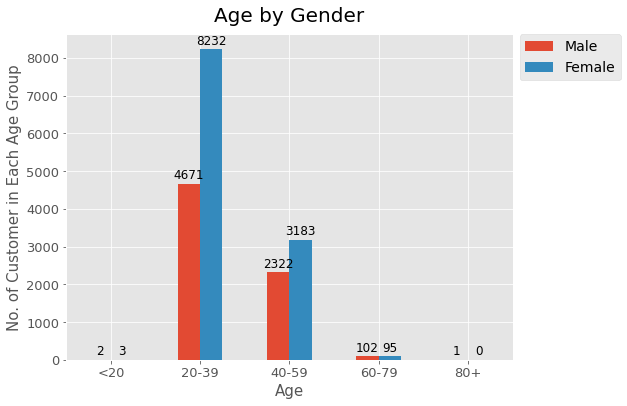

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot') #Plot style

tags = {"Male": 0, "Female": 1} #Storing the legend value into dictionary

ax = df1.plot(kind="bar", figsize=(8,6)) #Plotting the data frame into bar chart
plt.legend(tags, bbox_to_anchor=(1,1.02), fontsize="14", loc="upper left") #Adjusting the legend placement
plt.title("Age by Gender", size=20, pad=12) #Naming plot title
plt.xlabel("Age", size=15) #Naming x-axis
plt.ylabel("No. of Customer in Each Age Group", size=15) #Naming y-axis
plt.xticks(size="13", rotation="horizontal") #Adjusting x label size
plt.yticks(size="13") #Adjusting y label size

for c in ax.containers:
    ax.bar_label(c, label_type="edge", padding=2, fontsize=12) #Adding bar label count

plt.show()

### 2) Credit Balance by Income

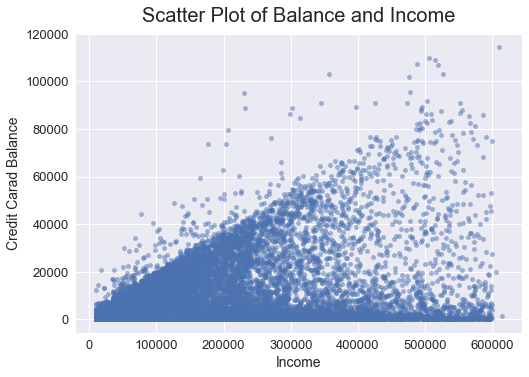

In [ ]:
plt.style.use("seaborn") #Plot Style

df.plot.scatter(x="INCOME", y="BALANCE", alpha=0.5) #Plotting the data into scatter plot
plt.title("Scatter Plot of Balance and Income", size=20, pad=12) #Naming plot title
plt.xlabel("Income",size=14) #Naming x-axis
plt.ylabel("Credit Carad Balance",size=14) #Naming y-axis
plt.xticks(size="13") #Adjusting x label size
plt.yticks(size="13") #Adjusting y label size
plt.show()

### 3) Ratings by Marital Status

In [ ]:
df3 = df.loc[:,["RATING","MARITAL"]]
df3.groupby(["RATING", "MARITAL"]) #To return a single aggregated value for each column group
df3 = pd.crosstab(df3.RATING,df3.MARITAL) #To create a cross tabulation of the data
df3 = pd.DataFrame(df3)
df3 = df3.div(df3.sum(axis=1), axis=0)*100 #Converting the values into percentage
df3 = df3.round(1) #Rounding off the percentage to 1 d.p
df3

MARITAL,0,1,2
RATING,,,
0,0.9,45.8,53.3
1,1.3,48.9,49.8


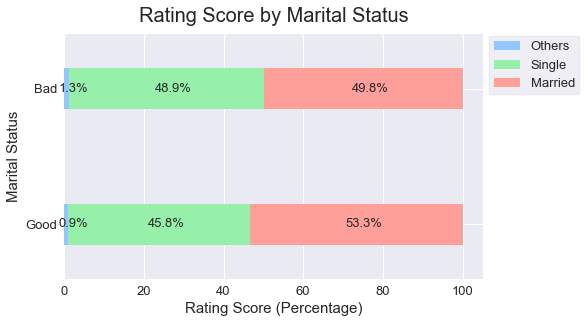

In [ ]:
marital_status = {"Others":0, "Single":1, "Married":2} #Storing legend values in dictionary

plt.style.use("seaborn-pastel") #Plot style

ax = df3.plot(kind="barh", stacked=True, width=0.3, figsize=(7.5,4.5)) #Plotting dataframe into horizontal stacked bar chart
plt.legend(marital_status,bbox_to_anchor=(1,1.02),  fontsize="13", loc="upper left", frameon=True) #Adjusting the legend placement
plt.title("Rating Score by Marital Status", size=20, pad=12) #Naming plot title
plt.xlabel("Rating Score (Percentage)", size="15") #Naming x-axis
plt.ylabel("Marital Status", size="15") #Naming y-axis
plt.xticks(size="13") #Changing x labels size
plt.yticks([0,1],["Good", "Bad"],size="13") #Changing y labels name and size

for c in ax.containers:
    ax.bar_label(c, label_type="center", padding=7, fontsize=13, fmt='%.1f%%') #Adding bar label percentage

plt.show()

### 4) Credit Card Limit by Repayment Status (May 2022)

In [ ]:
df4 = df.loc[:,["S1","LIMIT"]]
df4["limit_bin"] = df4["LIMIT"] // 100000 #Creating bin for limit column values
mask=df4.S1 > 1 #Combining all values of 2,3,4,5,6,7 into 1 as delayed payment for 1 months and above
column_name = "S1"
df4.loc[mask,column_name] = 1
df4 = pd.crosstab(df4.limit_bin,df4.S1) #To create cross tabulation of the data
df4

S1,-1,0,1
limit_bin,,,
0,747,4603,1695
1,993,3032,622
2,982,2524,310
3,509,1295,98
4,206,486,42
5,140,318,14


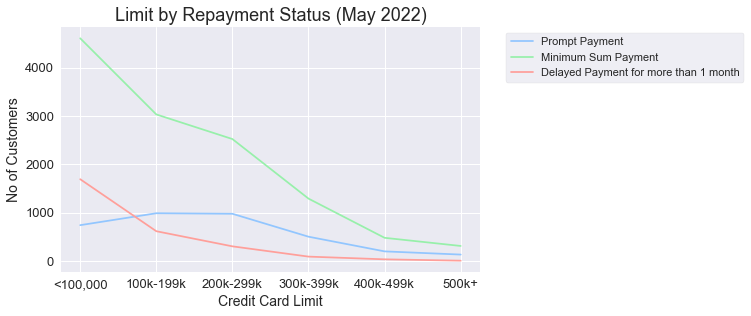

In [ ]:
payment_status = {"Prompt Payment": -1,"Minimum Sum Payment":0, "Delayed Payment for more than 1 month":2} #Storing legend values into dictionary

df4.plot(kind="line", figsize=(7.5,4.5)) #Plotting dataframe into line graph

plt.legend(payment_status, bbox_to_anchor=(1.05,1), fontsize="11", loc="upper left", frameon=True) #Adjusting the legend placement
plt.title("Limit by Repayment Status (May 2022)", size="18") #Naming plot title
plt.xlabel("Credit Card Limit", size="14") #Naming x-axis
plt.ylabel("No of Customers", size="14") #Naming y-axis
plt.xticks([0,1,2,3,4,5],["<100,000", "100k-199k","200k-299k","300k-399k","400k-499k","500k+"], size="13") #Changing x labels name and size
plt.yticks(size="13") #Changing y labels size
plt.show()

### 5) Box Plots of Bill Amount for 5 Months

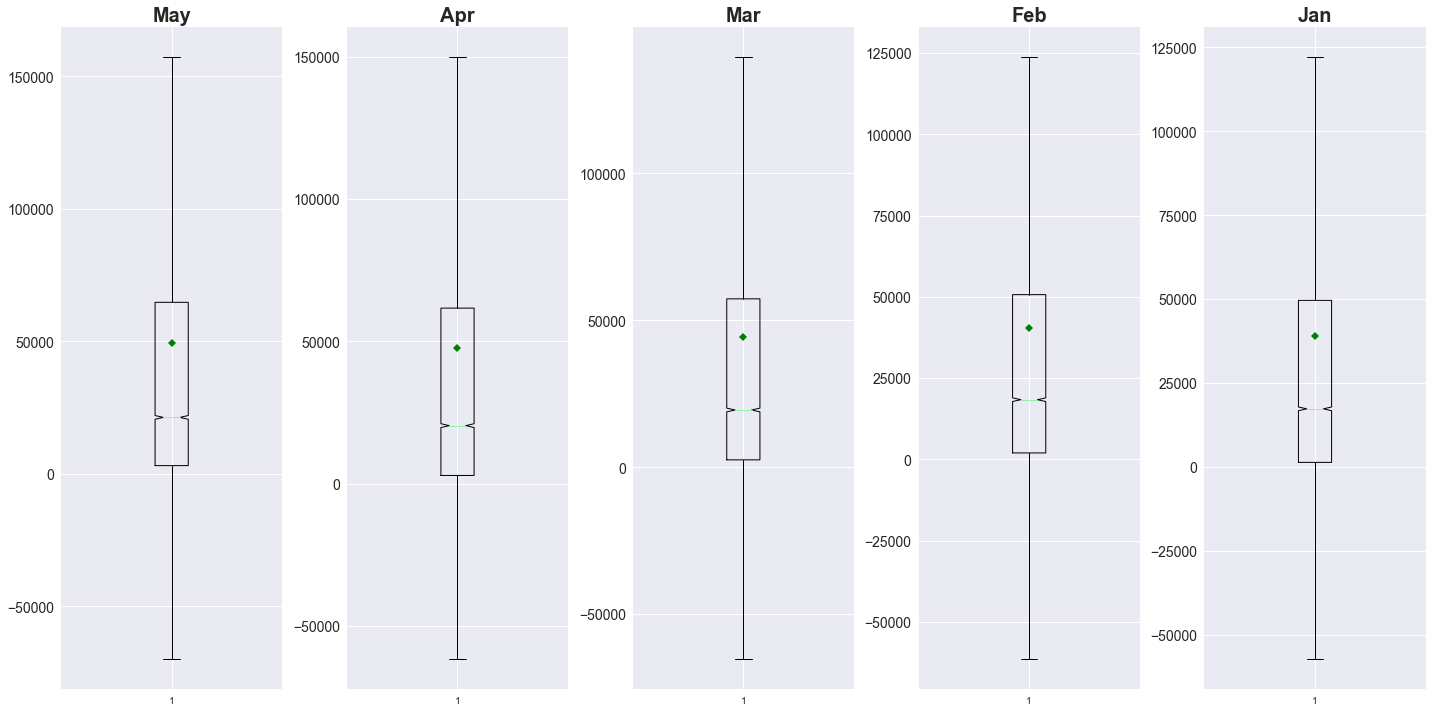

In [ ]:
df5 = df.loc[:,["B1","B2","B3","B4","B5"]]
df5.rename(columns = {"B1":"May","B2":"Apr","B3":"Mar","B4":"Feb","B5":"Jan"}, inplace=True) #Renaming columns name into name of months

outlier_marker = dict(markerfacecolor="red", marker="o", markeredgecolor="white") #To show outliers as red circle
mean_marker = dict(markerfacecolor="green", marker="D", markeredgecolor="green") #To mark the each mean value

fig, axs = plt.subplots(1, len(df5.columns), figsize=(20,10)) #To show 1 row and the number of columns to be the length of df5.columns

for i, ax in enumerate(axs.flat): #Using emunarate function to track index value
    ax.boxplot(df5.iloc[:,i], flierprops=outlier_marker, showmeans=True, meanprops=mean_marker, notch=True, showfliers=False) #Adding box plots and removing outliers
    ax.set_title(df5.columns[i], fontsize=20, fontweight="bold") #Setting the box plot title
    ax.tick_params(axis="y", labelsize=14) #Changing y label size

plt.tight_layout()

## Linear Regression to Predict Billamount Amount in May

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LinearRegression #Importing linear regression models from the module linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
df.B1 = np.where(df.B1 < 0, 0, df.B1) #Replacing negative values in B1 with 0
df.B2 = np.where(df.B2 < 0, 0, df.B2) #Replacing negative values in B2 with 0
df.B3 = np.where(df.B3 < 0, 0, df.B3) #Replacing negative values in B3 with 0
df.B4 = np.where(df.B4 < 0, 0, df.B4) #Replacing negative values in B4 with 0
df.B5 = np.where(df.B5 < 0, 0, df.B5) #Replacing negative values in B5 with 0

In [ ]:
numvar_list = ["LIMIT", "BALANCE", "INCOME", "B1", "B2", "B3", "B4", "B5", "R1", "R2", "R3", "R4", "R5"] #List of variables to scale
df_model_toscale = df[numvar_list]
df_model_toscale_colnam = list(df_model_toscale.columns.values)
df_model_toscale_rownam = list(df_model_toscale.index)
df_model_toscale

,LIMIT,BALANCE,INCOME,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,210000,0.000,235822,0,0,0,0,0,0,0,0,0,0
1,260000,10928.050,278481,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,400000,65397.850,431993,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,20000,3695.300,22368,21470,200,0,28740,1295,0,0,28740,1565,0
4,180000,68.250,166900,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,220000,33065.900,225862,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,150000,294.525,149966,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,30000,623.875,30327,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,80000,0.000,94607,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [ ]:
scaler = preprocessing.StandardScaler() #Initiating scaler for standardscaler() from preprocessing module
scaler.fit(df_model_toscale) #Computing using fit()
df_scaled = scaler.transform(df_model_toscale) #Standardised using transform()
df_final = pd.DataFrame(df_scaled, columns=df_model_toscale_colnam, index=df_model_toscale_rownam)

df_final = df_final.add_suffix("_norm") #Adding _norm to all labels of the standardised variables
numormvar_list = df_final.columns.values
df_model_final = pd.concat([df, df_final], axis=1) #Concatinating the df_final to original df
df_model_final

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1_norm,B2_norm,B3_norm,B4_norm,B5_norm,R1_norm,R2_norm,R3_norm,R4_norm,R5_norm
0,1,210000,0.000,235822,1,1,1,2,20-39,0,...,-0.704287,-0.695129,-0.692294,-0.678367,-0.672398,-0.262271,-0.306365,-0.305884,-0.324150,-0.299723
1,2,260000,10928.050,278481,0,0,2,2,20-39,0,...,0.066434,-0.017121,-0.086880,-0.153739,-0.259447,-0.174430,-0.196333,-0.179925,-0.184986,3.929931
2,3,400000,65397.850,431993,0,0,3,1,40-59,0,...,4.192945,4.454676,4.584453,4.066267,2.511605,0.396541,0.463857,0.418381,0.232507,0.111493
3,4,20000,3695.300,22368,0,0,2,1,40-59,-1,...,-0.398273,-0.692207,-0.692294,-0.197017,-0.650144,-0.262271,-0.306365,1.504149,-0.215254,-0.299723
4,5,180000,68.250,166900,0,1,2,1,40-59,0,...,-0.686328,-0.686392,-0.660275,-0.606349,-0.641432,-0.236007,-0.193253,-0.035072,-0.198763,-0.082894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,20-39,0,...,2.043922,2.349092,0.678259,-0.155196,-0.397796,0.616145,-0.031121,-0.113985,0.023761,-0.240978
18765,18763,150000,294.525,149966,0,0,3,2,40-59,-1,...,-0.678233,-0.643965,-0.552458,-0.591443,-0.672398,-0.107406,0.188668,-0.297760,-0.324150,-0.299723
18766,18764,30000,623.875,30327,1,0,2,2,20-39,3,...,-0.656454,-0.654834,-0.367146,-0.333651,-0.339766,-0.262271,0.903984,-0.041370,-0.184986,-0.117613
18767,18765,80000,0.000,94607,1,0,3,1,40-59,-1,...,0.412855,0.419675,0.129595,-0.479814,0.168660,-0.112545,-0.241557,-0.184586,3.361200,-0.193747


In [ ]:
print(df_model_final.shape)

(18616, 37)


In [ ]:
x=df_model_final[["LIMIT_norm","BALANCE_norm","INCOME_norm","R1_norm","R2_norm","R3_norm","R4_norm","R5_norm"]].values #Defining the x variables
y=df_model_final["B1_norm"].values #Defining the y variables
print(x)
print(y)

[[ 0.35242481 -0.70838129  0.43821857 ... -0.30588431 -0.32414994
  -0.29972291]
 [ 0.75124125  0.15114131  0.74593404 ... -0.17992511 -0.18498561
   3.92993093]
 [ 1.86792727  4.43534795  1.85327404 ...  0.4183811   0.23250736
   0.11149344]
 ...
 [-1.08331436 -0.65931172 -1.04409443 ... -0.04136999 -0.18498561
  -0.11761281]
 [-0.68449792 -0.70838129 -0.58041852 ... -0.1845856   3.36119972
  -0.19374658]
 [-0.92378778 -0.04867436 -0.97239345 ... -0.24290471 -0.25456777
  -0.24097771]]
[-0.70428715  0.06643422  4.19294492 ... -0.6564538   0.41285548
 -0.00723998]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.20, random_state = 0) #Splitting the date into train and test set

In [ ]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (14892, 8)
x_test (3724, 8)
y_train (14892,)
y_test (3724,)


In [ ]:
reg = LinearRegression() #Initiating linear regression function to train model on train sets
reg.fit(x_train, y_train) #Fitting train sets into linear regression

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error #Importing mean_squared_error and r2_score function
from sklearn.metrics import r2_score
import numpy as np

y_train_predict = reg.predict(x_train) #Initiating predict function on train set
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict))) #Calculating rmse between actual and predicted
r2 = r2_score(y_train, y_train_predict) #Calculating r2 between actual and predicted

print("Training set model performance:")
print("RMSE is ", end="")
print(round(rmse,4))
print("R2 score is ", end="")
print(round(r2,4))
print("\n")

y_test_predict = reg.predict(x_test) #Initating predict function on test set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict))) #Calculating rmse between actual and predicted
r2 = r2_score(y_test, y_test_predict) #Calculating r2 between actual and predicted

print("Testing set model performance:")
print("RMSE is ", end="")
print(round(rmse,4))
print("R2 score is ", end="")
print(round(r2,4))

Training set model performance:
RMSE is 0.3118
R2 score is 0.9018


Testing set model performance:
RMSE is 0.3146
R2 score is 0.9049


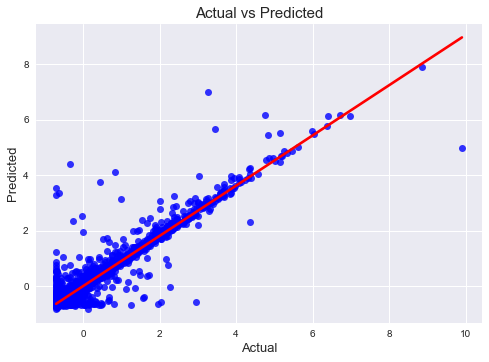

In [ ]:
import seaborn as sns

sns.regplot(x=y_test, y=y_test_predict, ci=None, scatter_kws={"color":"blue"}, line_kws={"color":"red"}) #Plotting results into scatter plot
plt.xlabel("Actual", size="13") #Naming x label
plt.ylabel("Predicted", size="13") #Naming y label
plt.title("Actual vs Predicted", size="15") #Naming title
plt.show()

In [ ]:
pred_df=pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_test_predict, "Difference":y_test-y_test_predict}) #Putting predicted values in dataframe
pred_df

,Actual Value,Predicted Value,Difference
0,1.313351,1.173368,0.139983
1,0.040579,-0.003966,0.044545
2,-0.585830,-0.575701,-0.010129
3,-0.697902,-0.635738,-0.062164
4,-0.012571,-0.015957,0.003386
...,...,...,...
3719,2.727913,2.432425,0.295488
3720,-0.704287,-0.340542,-0.363746
3721,-0.689450,-0.660259,-0.029191
3722,-0.523815,-0.467498,-0.056317


In [ ]:
reg.intercept_ #Getting the regression intercepts

-0.0005337682412392857

In [ ]:
reg.coef_ #Getting the regression coefficients for each independent variables

array([-0.00624678,  0.95103098,  0.01544411,  0.01834389, -0.00489075,
       -0.01519643, -0.00522314, -0.00952318])